## Uppgift 1 - uppvärmning betyg och prov

- I uppgifterna nedan ska du använda dig av datasetet betyg_o_prov_riksnivå.xlsx. Använd Plotly för att rita diagrammen nedan för de uppgifter som kräver diagram. Använd Pandas för att svara på frågor om datasetet.

- A) Rita ett linjediagram för andel elever som saknar godkänt betyg i ett eller fler ämnen för läsår 18-23. Ta med totalt, flickor och pojkar i samma graf.

In [12]:
import pandas as pd

df_betyg = pd.read_excel("../Uppgift_1/betyg_o_prov_riksnivå.xlsx", skiprows=9)

df_betyg = df_betyg.drop([5,7,10,17,24,28])


In [43]:
column_rename = {df_betyg.columns[1]: "Totalt" , df_betyg.columns[2]: "Flickor" , df_betyg.columns[3]: "Pojkar " , df_betyg.columns[4]: "Totalt " , df_betyg.columns[5]: "Flickor" , df_betyg.columns[6]: "Pojkar", df_betyg.columns[7]: "Totalt" , df_betyg.columns[8]: "Flickor" , df_betyg.columns[9]: "Pojkar"}

df_betyg = df_betyg.rename(columns=column_rename)

df_betyg


,Unnamed: 0,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar
0,2018/19,112731.0,54667.0,58064.0,112280,54430,57850,110663,53757,56906
1,2019/20,115023.0,55670.0,59353.0,114444,55389,59055,112728,54711,58017
2,2020/21,116359.0,56715.0,59644.0,115710,56394,59316,114136,55721,58415
3,2021/22,120525.0,58513.0,62012.0,119891,58207,61684,117935,57312,60623
4,2022/23,121369.0,59043.0,62326.0,120742,58703,62039,118736,57781,60955
6,Kommun,96204.0,46478.0,49726.0,95991,46363,49628,94276,45588,48688
8,Internationella skolor,213.0,115.0,98.0,.,.,.,.,.,.
9,Enskild,25165.0,12565.0,12600.0,24751,12340,12411,24460,12193,12267
11,Allmän inriktning,23085.0,11511.0,11574.0,23085,11511,11574,22815,11372,11443
12,Konfessionell,1036.0,532.0,504.0,1036,532,504,1025,526,499


In [44]:

# Assuming df_betyg is your DataFrame
df = pd.DataFrame(df_betyg)
result_data = []

for i in range(5):  # Adjust the range based on the number of rows you want to calculate

    year_index = df.iloc[i , 0]
    percentage_not_passed_totalt = ((df.iloc[i, 1] - df.iloc[i, 7]) / df.iloc[i, 1]) * 100
    percentage_not_passed_flickor = ((df.iloc[i, 2] - df.iloc[i, 8]) / df.iloc[i, 2]) * 100
    percentage_not_passed_pojkar = ((df.iloc[i, 3] - df.iloc[i, 9]) / df.iloc[i, 3]) * 100

    # Append the results to the list
    result_data.append({'Index': year_index,
                        'Totalt': percentage_not_passed_totalt,
                        'Flickor': percentage_not_passed_flickor,
                        'Pojkar': percentage_not_passed_pojkar})

# Create the final DataFrame
result_df = pd.DataFrame(result_data)

# Print the final DataFrame
pd.options.display.float_format = '{:.2f}%'.format
result_df


,Index,Totalt,Flickor,Pojkar
0,2018/19,1.83%,1.66%,1.99%
1,2019/20,2.00%,1.72%,2.25%
2,2020/21,1.91%,1.75%,2.06%
3,2021/22,2.15%,2.05%,2.24%
4,2022/23,2.17%,2.14%,2.20%


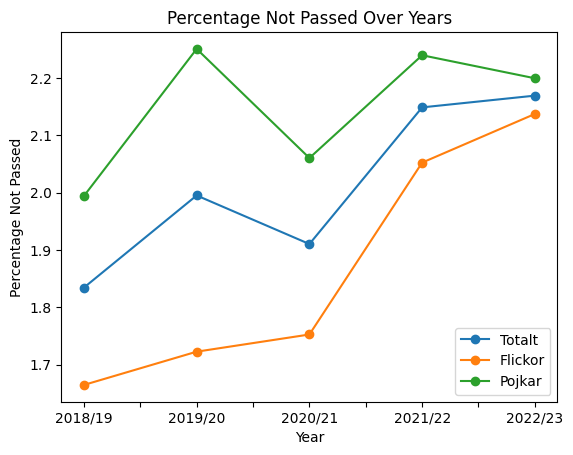

In [46]:
import matplotlib.pyplot as plt 

result_df.set_index('Index', inplace=True)

result_df.plot(marker='o', linestyle='-')
plt.title('Percentage Not Passed Over Years')
plt.xlabel('Year')
plt.ylabel('Percentage Not Passed')
plt.show()


- B) Rita ett linjediagram för meritvärde för 16 ämnen för totalt, flickor och pojkar för läsår 18-23.

In [58]:
df_betyg_tabell2 = pd.read_excel("../Uppgift_1/betyg_o_prov_riksnivå.xlsx", skiprows=7 , sheet_name="Tabell 1B")

df_betyg_tabell2 = df_betyg_tabell2.drop([5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27])
df_betyg_tabell2 = df_betyg_tabell2.iloc[:,:4]

df_betyg_tabell2


,Unnamed: 0,Totalt,Flickor,Pojkar
0,2018/19,221.70%,234.30%,209.80%
1,2019/20,222.90%,235.70%,210.90%
2,2020/21,223.90%,235.40%,212.90%
3,2021/22,221.20%,231.60%,211.40%
4,2022/23,220.60%,229.70%,211.90%


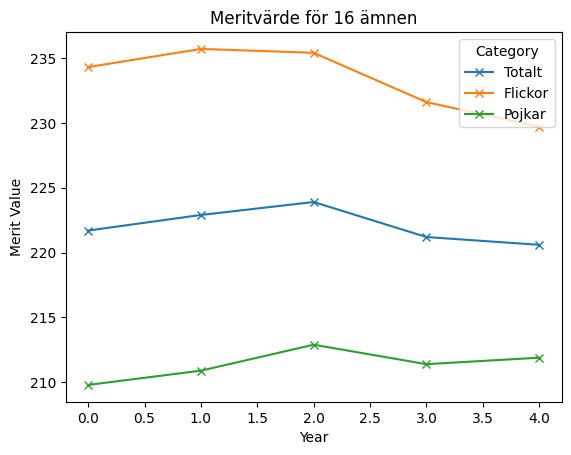

In [72]:
import matplotlib.pyplot as plt

# Assuming df_betyg_tabell2 is your DataFrame
selected_columns = ['Totalt', 'Flickor', 'Pojkar']
df_plot = df_betyg_tabell2[selected_columns]

# Plotting
df_plot.plot(marker='x', linestyle='-')
plt.title('Meritvärde för 16 ämnen')
plt.xlabel('Year')
plt.ylabel('Merit Value')  # Update the ylabel accordingly
plt.legend(title='Category')
plt.show()


-  C) Undersök nu andra variabler, och hur de påverkar meritvärde och andel med minst ett saknat betyg. Data finns för läsår 22/23. Exempel kan man undersöka föräldrarnas utbildningsbakgrund. Rita lämpliga grafer.